In [42]:
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import matplotlib.pyplot as plt
import csv
import os
import time
import datetime
import scipy as stats
import arrow
from citipy import citipy
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import time

In [43]:
# Lists for holding Us Geological Survey (USGS) json data
mag_data = []
place_data = []
time_data = []
updated_data = []
tz_data = []
url_data = []
detail_data = []
felt_data = []
cdi_data = []
mmi_data = []
alert_data = []
status_data = []
tsunami_data = []
sig_data = []
net_data = []
code_data = []
ids_data = []
sources_data = []
types_data = []
nst_data = []
dmin_data = []
rms_data = []
gap_data = []
magType_data = []
type_data = []
title_data = []
geo_type_data = []
lng_data = []
lat_data = []
coordinates_3_data = []
city_data = []

#calculated lists
converted_date = []
cd_by_month = []
cd_by_year = []
cd_for_plot = []

epoch_by_month = []


In [44]:
#https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2017-07-14%2000:00:00&endtime=2017-09-21%2023:59:59&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time

years = 5
start = 1900
end = 2025
start_loop = start

json_returns = (((end +5)-start)/years)+1



for x in range(int(json_returns)):

    url_bit_1 = "https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime="
    year_from_1 = str(start_loop)
    year_from_2= "-01-01"
    year_to = str(int(year_from_1) + years)
    url_bit_2= "-01-01%0000:00:00&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time"

    # Build partial query URL
    Search = url_bit_1 + year_from_1 + year_from_2  + "%0000:00:01&endtime=" + year_to + url_bit_2
    #Search

    # set response variable
    response = req.get(Search).json()

    # idetify how many seismic events are in our json
    usgs_json_data = json.dumps(response)

    item_dict = json.loads(usgs_json_data)

    json_loops = len(item_dict['features'])

    #append usgs_json_data into list form

    json_counter = 0

    for x in range(json_loops):

        mag_data.append(response["features"][json_counter]["properties"]["mag"])
        place_data.append(response["features"][json_counter]["properties"]["place"])
        time_data.append(response["features"][json_counter]["properties"]["time"])
        updated_data.append(response["features"][json_counter]["properties"]["updated"])
        tz_data.append(response["features"][json_counter]["properties"]["tz"])
        url_data.append(response["features"][json_counter]["properties"]["url"])
        detail_data.append(response["features"][json_counter]["properties"]["detail"])
        felt_data.append(response["features"][json_counter]["properties"]["felt"])
        cdi_data.append(response["features"][json_counter]["properties"]["cdi"])
        mmi_data.append(response["features"][json_counter]["properties"]["mmi"])
        alert_data.append(response["features"][json_counter]["properties"]["alert"])
        status_data.append(response["features"][json_counter]["properties"]["status"])
        tsunami_data.append(response["features"][json_counter]["properties"]["tsunami"])
        sig_data.append(response["features"][json_counter]["properties"]["sig"])
        net_data.append(response["features"][json_counter]["properties"]["net"])
        code_data.append(response["features"][json_counter]["properties"]["code"])
        ids_data.append(response["features"][json_counter]["properties"]["ids"])
        sources_data.append(response["features"][json_counter]["properties"]["sources"])
        types_data.append(response["features"][json_counter]["properties"]["types"])
        nst_data.append(response["features"][json_counter]["properties"]["nst"])
        dmin_data.append(response["features"][json_counter]["properties"]["dmin"])
        rms_data.append(response["features"][json_counter]["properties"]["rms"])
        gap_data.append(response["features"][json_counter]["properties"]["gap"])
        magType_data.append(response["features"][json_counter]["properties"]["magType"])
        type_data.append(response["features"][json_counter]["properties"]["type"])
        title_data.append(response["features"][json_counter]["properties"]["title"])
        geo_type_data.append(response["features"][json_counter]["geometry"]["type"])
        lng_data.append(response["features"][json_counter]["geometry"]["coordinates"][0])
        lat_data.append(response["features"][json_counter]["geometry"]["coordinates"][1])
        coordinates_3_data.append(response["features"][json_counter]["geometry"]["coordinates"][2])
        city_data.append(citipy.nearest_city(lat_data[len(lat_data)-1], lng_data[len(lng_data)-1]).city_name)
        
        
        # calculated fields
        
        converted_date.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(converted_date)-1])).strftime('%m-%d-%Y'))
        cd_by_month.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1])).strftime('%m-%Y'))
        cd_by_year.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_year)-1])).strftime('%Y'))
        cd_for_plot.append(datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1]))
        
        
        epoch_by_month.append(arrow.get(cd_by_month[len(cd_by_month)-1], 'MM-YYYY').format('X'))
        
               
        json_counter = json_counter + 1    
        
    start_loop = year_to     

In [45]:
seismic_data = {"mag" : mag_data,
                "place" : place_data,
                "time" : time_data,
                "updated" : updated_data,
                "tz" : tz_data,
                "url" : url_data,
                "detail" : detail_data,
                "felt" : felt_data,
                "cdi" : cdi_data,
                "mmi" : mmi_data,
                "alert" : alert_data,
                "status" : status_data,
                "tsunami" : tsunami_data,
                "sig" : sig_data,
                "net" : net_data,
                "code" : code_data,
                "ids" : ids_data,
                "sources" : sources_data,
                "types" : types_data,
                "nst" : nst_data,
                "dmin" : dmin_data,
                "rms" : rms_data,
                "gap" : gap_data,
                "magType" : magType_data,
                "type" : type_data,
                "title" : title_data,
                "geo_type" : geo_type_data,
                "lng" : lng_data,
                "lat" : lat_data,
                "coordinates_3" : coordinates_3_data,
                "city" : city_data,
                
                "converted_date" : converted_date,
                "cd_by_month" : cd_by_month,
                "cd_by_year" : cd_by_year,
                "cd_for_plot" : cd_for_plot,
                
                "epoch_by_month" : epoch_by_month,
                
               }

seismic_data = pd.DataFrame(seismic_data)

#first and last event
year_range = seismic_data.iloc[0,2] + " through " + seismic_data.iloc[len(seismic_data)-1,2]


In [46]:
seismic_data.to_csv("seismic_data.csv")

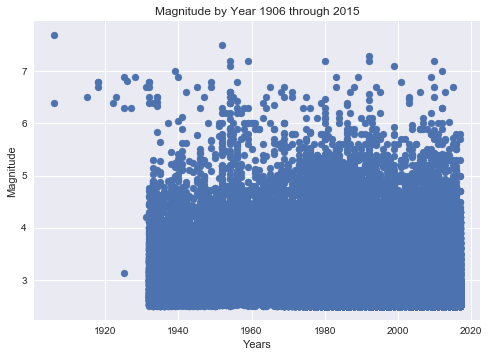

In [47]:
# Build a scatter plot for each data type
plt.scatter(seismic_data["cd_by_year"], seismic_data["mag"], marker="o")

# Incorporate the other graph properties
plt.title("Magnitude by Year" + " " + year_range)
plt.ylabel("Magnitude")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude by Month.png")

# Show plot
plt.show()

In [48]:
seismic_avg_year = seismic_data.groupby(["cd_by_year"]).mean()["mag"]
seismic_count_year = seismic_data.groupby(["cd_by_year"]).count()["mag"]


# time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())

# unix_month_year = seismic_data.["cd_by_year"]
# unix_year

seismic_data2_df = pd.DataFrame({"seismic_avg_year" : seismic_avg_year,
                                "seismic_count_year" : seismic_count_year,
                                })

seismic_data2_df = seismic_data2_df.reset_index()

seismic_data2_df.head()


,cd_by_year,seismic_avg_year,seismic_count_year
0,1906,7.050000,2
1,1915,6.500000,1
2,1918,6.766667,3
3,1922,6.400000,1
4,1923,6.500000,1


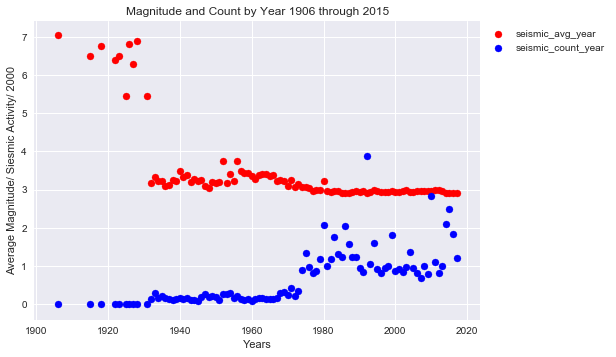

In [49]:
# Build a scatter plot for each data type
plt.scatter(seismic_data2_df["cd_by_year"], seismic_data2_df["seismic_avg_year"], marker="o", c=["red"])
plt.scatter(seismic_data2_df["cd_by_year"], seismic_data2_df["seismic_count_year"]/2000, marker="o", c=["blue"])

# Incorporate the other graph properties
plt.title("Magnitude and Count by Year" + " " + year_range)
plt.ylabel("Average Magnitude/ Siesmic Activity/ 2000")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Year.png")

plt.legend(bbox_to_anchor=(1.3, 1))

# Show plot
plt.show()

In [50]:
seismic_avg_month_year = seismic_data.groupby(["epoch_by_month"]).mean()["mag"]
seismic_count_month_year = seismic_data.groupby(["epoch_by_month"]).count()["mag"]

seismic_data3_df = pd.DataFrame({"seismic_avg_month_year" : seismic_avg_month_year,
                                "seismic_count_month_year" : seismic_count_month_year,
                                })

seismic_data3_df = seismic_data3_df.reset_index()

seismic_data3_df.head()

,epoch_by_month,seismic_avg_month_year,seismic_count_month_year
0,-1002067200,3.304848,33
1,-1004745600,3.174444,9
2,-1007164800,3.336364,11
3,-1009843200,2.995000,22
4,-1012521600,3.287143,21


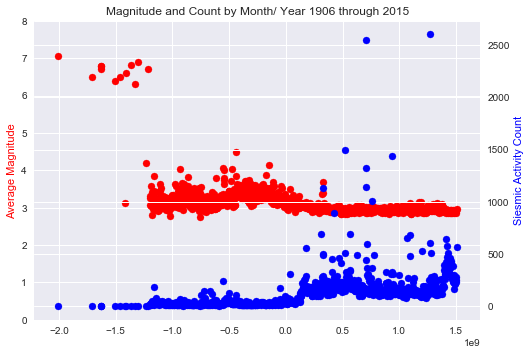

In [51]:
x = (seismic_data3_df["epoch_by_month"])

y1 = seismic_data3_df["seismic_avg_month_year"]
y2 = seismic_data3_df["seismic_count_month_year"]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='r')
ax2.scatter(x, y2, c='b')


ax1.set_ylim(0, 8)

# Incorporate the other graph properties
plt.title("Magnitude and Count by Month/ Year" + " " + year_range)
ax1.set_ylabel("Average Magnitude", color = "r")
ax2.set_ylabel("Siesmic Activity Count", color = "b")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Year.png")


# formatter = 
# plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

plt.show()

# TESTING FROM HERE DOWN

In [52]:
#"cd_for_plot", "cd_by_month"

In [53]:
# seismic_avg_month = seismic_data.groupby(["cd_for_plot"]).mean()["mag"]
# seismic_count_month = seismic_data.groupby(["cd_for_plot"]).count()["mag"]

cd_for_plot 
seismic_avg_month = seismic_data["mag"]
seismic_count_month = seismic_data["mag"]

# time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())

# unix_month_year = seismic_data.["cd_by_year"]
# unix_year

seismic_data4_df = pd.DataFrame({"cd_for_plot" : cd_for_plot,
                                "seismic_avg_month" : seismic_avg_month,
                                "seismic_count_month" : seismic_count_month,
                                })

seismic_data4_df = seismic_data4_df.reset_index()

seismic_data4_df.head()

,index,cd_for_plot,seismic_avg_month,seismic_count_month
0,0,1906-04-18 13:12:27,7.7,7.7
1,1,1918-07-15 00:23:13,6.4,6.4
2,2,1918-05-23 11:57:40,6.8,6.8
3,3,1918-04-21 22:32:29,6.7,6.7
4,4,1915-10-03 06:53:21,6.8,6.8


In [54]:
seismic_data4_df.to_csv("seismic_data4_df.csv")

In [55]:
#===========================================================================================================================
#===========================================================================================================================
#===========================================================================================================================


# x = (seismic_data4_df["cd_for_plot"])

y1 = seismic_data4_df["seismic_avg_month"]
y2 = seismic_data4_df["seismic_count_month"]


x = seismic_data4_df[cd_for_plot]
x = mdates.date2num(x)

#plt.subplots_adjust(bottom=0.2)


plt.xticks( rotation=25 )
#ax=plt.gca()


# xfmt = mdates.DateFormatter('%m-%Y')
# ax.xaxis.set_major_formatter(xfmt)

#x = mdates.DateFormatter("cd_for_plot",'%Y-%m-%d %H:%M:%S')
#ax.xaxis.set_major_formatter(xfmt)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

KeyError: '[datetime.datetime(1906, 4, 18, 13, 12, 27)\n datetime.datetime(1918, 7, 15, 0, 23, 13)\n datetime.datetime(1918, 5, 23, 11, 57, 40) ...,\n datetime.datetime(2015, 1, 1, 8, 35, 23, 800000)\n datetime.datetime(2015, 1, 1, 4, 40, 19, 300000)\n datetime.datetime(2015, 1, 1, 0, 26, 9, 600000)] not in index'

In [ ]:
cd_for_plot

In [ ]:
x = (seismic_data4_df["cd_for_plot"])

y1 = seismic_data4_df["seismic_avg_year"]
y2 = seismic_data4_df["seismic_count_year"]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='r')
ax2.scatter(x, y2, c='b')

# Incorporate the other graph properties
plt.title("Magnitude and Count by Month/ Year" + " " + year_range)
ax1.set_ylabel("Average Magnitude", color = "r")
ax2.set_ylabel("Siesmic Activity Count", color = "b")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Year.png")


# formatter = 
# plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

plt.show()

In [ ]:

#+ Generate some random data.
x = (seismic_data4_df["cd_for_plot"])

y1 = seismic_data4_df["seismic_avg_year"]
y2 = seismic_data4_df["seismic_count_year"]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='r')
ax2.scatter(x, y2, c='b')

# Convert to the correct format for matplotlib.
# mdate.epoch2num converts epoch timestamps to the right format for matplotlib
secs = mdate.epoch2num(x.values)


fig, ax = plt.subplots()

# Plot the date using plot_date rather than plot
ax.plot_date(secs, vals)

# Choose your xtick format string
date_fmt = '%m-%Y'

# Use a DateFormatter to set the data to the correct format.
date_formatter = mdate.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatter)

# Sets the tick labels diagonal so they fit easier.
fig.autofmt_xdate()

plt.show()


In [ ]:
# Generate some random data.
N = 40
now = 1398432160
raw = np.array([now + i*1000 for i in range(N)])
vals = np.sin(np.linspace(0,10,N))

# Convert to the correct format for matplotlib.
# mdate.epoch2num converts epoch timestamps to the right format for matplotlib
secs = mdates.epoch2num(raw)


fig, ax = plt.subplots()

# Plot the date using plot_date rather than plot
ax.plot_date(secs, vals)

# Choose your xtick format string
date_fmt = '%m-%Y'

# Use a DateFormatter to set the data to the correct format.
date_formatter = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatter)

# Sets the tick labels diagonal so they fit easier.
fig.autofmt_xdate()

plt.show()

In [ ]:
x = (seismic_data4_df["cd_for_plot"])

y1 = seismic_data4_df["seismic_avg_month"]
y2 = seismic_data4_df["seismic_count_month"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#===================================================================================

# timestamps = x.astype(int).values


# dates = [dt.datetime.fromtimestamp(ts) for ts in timestamps]


# datenums=md.date2num(dates)

#===================================================================================


plt.xticks( rotation=25 ) # keep

ax=plt.gca()


xfmt = x.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(xfmt)

ax1.scatter(x, y1, c='r')
ax2.scatter(x, y2, c='b')


plt.show()

In [ ]:
n=4
duration=10
now=time.mktime(time.localtime())
timestamps=np.linspace(now,now+duration,n)

dates=[datetime.datetime(x)]
datenums=md.date2num(dates)

values=np.sin((timestamps-now)/duration*2*np.pi)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums,values)
plt.show()

In [ ]:
# seismic_avg_month = seismic_data.groupby(["cd_for_plot"]).mean()["mag"]
# seismic_count_month = seismic_data.groupby(["cd_for_plot"]).count()["mag"]

cd_for_plot 
seismic_activity = seismic_data["mag"]

# time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())

# unix_month_year = seismic_data.["cd_by_year"]
# unix_year

seismic_data5_df = pd.DataFrame({"cd_for_plot" : cd_for_plot,
                                "seismic_activity" : seismic_activity,
                                 })

#seismic_data5_df = seismic_data5_df.reset_index()

seismic_data5_df.head()

In [ ]:
import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
y1 = seismic_data4_df["seismic_avg_month"]



x = seismic_data4_df[cd_for_plot]
x = mdates.date2num(x)

#plt.subplots_adjust(bottom=0.2)


plt.xticks( rotation=25 )

In [ ]:
cd_for_plot

dt.datetime.fromtimestamp(x)

In [ ]:
plt.scatter(seismic_data["epoch_by_month"], seismic_data["mag"])
plt.show()

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x = [datetime.datetime(1970, 4, 18)]
y = seismic_data["mag"]

fig, ax = plt.subplots()
ax.plot_date(x, y, linestyle='--')

ax.annotate('Test', (mdates.date2num(x[1]), y[1]), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

fig.autofmt_xdate()
plt.show()

In [ ]:
seismic_data["mag"]

In [ ]:
cd_for_plot

In [ ]:
seismic_data["cd_by_month"]

In [ ]:
mdates.num2date(2011910)

In [ ]:
Search

In [ ]:
citipy.nearest_city(lat_data[1], lng_data[1]).city_name